# `Hypothesis:` 
* Countries in the middle east will tend to have a higher death rate among the ranges of 15-19 and 20-24 than more than half of the first world countries

In [127]:
%reload_ext autoreload
%autoreload 2

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
DIEPROB1519 = subset["SH.DYN.1519"]
DIEPROB2024 = subset["SH.DYN.2024"]
# For data plot:
DEATH_PROB_15_19 = "SH.DYN.1519"
DEATH_PROB_20_24 = "SH.DYN.2024"

* `SH.DYN.2024` - Probability of dying among youth ages 20-24 years (per 1,000)
* `SH.DYN.1519` - Probability of dying among adolescents ages 15-19 years (per 1,000)

In [68]:
databank = pd.read_csv("../../data/databank_education_2018.csv")

In [69]:
print(databank.shape)
databank.head(10)

(244, 94)


,Country,SE.COM.DURS,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.DURS,SE.PRE.ENRL.TC.ZS,SE.PRE.ENRR,SE.PRE.ENRR.FE,...,SH.DYN.1014,SH.DYN.1519,SH.DYN.2024,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS
0,Afghanistan,9.0,0.66691,0.63602,0.57098,0.34523,1.0,NaN,NaN,NaN,...,2.000000,13.800000,17.600000,21.247021,10319282.0,13.920000,10.290000,11.060000,43.090176,54.324898
1,Albania,9.0,1.03765,1.01730,1.00539,1.36299,5.0,17.09409,80.498734,80.790977,...,1.100000,1.800000,1.900000,42.190687,1400072.0,11.870000,12.620000,12.300000,17.672874,68.582390
2,Algeria,10.0,0.95499,NaN,NaN,1.39722,1.0,NaN,NaN,NaN,...,1.700000,2.700000,3.300000,20.126974,12589369.0,20.490000,9.720000,11.890000,30.148679,63.488825
3,Andorra,10.0,NaN,NaN,NaN,NaN,3.0,13.27711,NaN,NaN,...,0.500000,1.400000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,6.400000,13.100000,19.900000,50.202910,12705650.0,7.280000,6.720000,7.000000,46.808925,50.974702
5,Antigua and Barbuda,11.0,0.99208,0.97924,0.96286,NaN,5.0,NaN,70.253601,74.025070,...,1.000000,2.500000,3.200000,NaN,NaN,NaN,NaN,NaN,22.081092,69.119083
6,Arab World,9.0,0.94617,0.94833,0.95186,1.09935,3.0,21.16757,27.001801,26.855440,...,2.923226,6.268086,8.017785,20.368759,134761988.0,19.903642,7.788688,10.256798,32.780436,62.661687
7,Argentina,14.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,1.100000,3.500000,4.900000,43.001857,20551682.0,10.540000,8.230000,9.220000,24.760934,64.121277
8,Armenia,12.0,0.99961,1.02283,1.03762,1.24788,3.0,6.27090,38.021290,39.659691,...,1.000000,2.300000,2.700000,44.231575,1245626.0,20.400000,17.830000,18.969999,20.633422,68.112760
9,Aruba,13.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.802447,68.646606


In [92]:
subset = databank[["Country", DEATH_PROB_20_24, DEATH_PROB_15_19]]

In [71]:
subset.head(10)

,Country,SH.DYN.2024,SH.DYN.1519
0,Afghanistan,17.600000,13.800000
1,Albania,1.900000,1.800000
2,Algeria,3.300000,2.700000
3,Andorra,2.100000,1.400000
4,Angola,19.900000,13.100000
5,Antigua and Barbuda,3.200000,2.500000
6,Arab World,8.017785,6.268086
7,Argentina,4.900000,3.500000
8,Armenia,2.700000,2.300000
9,Aruba,NaN,NaN


In [72]:
print(subset.shape)

(244, 3)


In [75]:
complete_subset = subset[DIEPROB1519.notna() & DIEPROB2024.notna()]
complete_subset.head(10)

,Country,SH.DYN.2024,SH.DYN.1519
0,Afghanistan,17.600000,13.800000
1,Albania,1.900000,1.800000
2,Algeria,3.300000,2.700000
3,Andorra,2.100000,1.400000
4,Angola,19.900000,13.100000
5,Antigua and Barbuda,3.200000,2.500000
6,Arab World,8.017785,6.268086
7,Argentina,4.900000,3.500000
8,Armenia,2.700000,2.300000
10,Australia,2.000000,1.500000


In [74]:
# part1 = subset[DIEPROB1519.notna()]
# part2 = subset[DIEPROB2024.notna()]
# complete_subset = part1 + part2
# complete_subset.head(10)

In the cell bellow, `complete_subset` is being displayed as a `NEW (not mutated)` **`DataSeries`** in descending order based off the values in the **`Series`** `"SH.DYN.1519"`:

In [94]:
complete_subset.sort_values(by=DEATH_PROB_15_19, ascending=False).head(10)

,Country,SH.DYN.2024,SH.DYN.1519
193,Sierra Leone,28.1,25.6
127,Liberia,10.5,19.0
44,"Congo, Dem. Rep.",19.9,18.5
199,Somalia,26.3,17.6
39,Chad,19.8,16.0
220,Timor-Leste,12.0,15.1
0,Afghanistan,17.6,13.8
85,Guinea,18.7,13.7
228,Uganda,14.1,13.6
37,Central African Republic,26.4,13.1


array([[[['Afghanistan', 17.6, 13.8],
         ['Albania', 1.9, 1.8],
         ['Algeria', 3.3, 2.7],
         ['Andorra', 2.1, 1.4],
         ['Angola', 19.9, 13.1],
         ['Antigua and Barbuda', 3.2, 2.5],
         ['Arab World', 8.017785326, 6.26808643],
         ['Argentina', 4.9, 3.5],
         ['Armenia', 2.7, 2.3],
         ['Australia', 2.0, 1.5],
         ['Austria', 1.6, 1.3],
         ['Azerbaijan', 3.3, 2.6],
         ['Bahamas, The', 12.7, 4.9],
         ['Bahrain', 2.8, 2.1],
         ['Bangladesh', 5.3, 6.5],
         ['Barbados', 3.7, 2.4],
         ['Belarus', 2.6, 1.6],
         ['Belgium', 1.8, 1.1],
         ['Belize', 7.6, 4.2],
         ['Benin', 11.3, 11.3],
         ['Bhutan', 6.8, 5.6],
         ['Bolivia', 5.3, 4.7],
         ['Bosnia and Herzegovina', 2.5, 1.7],
         ['Botswana', 11.5, 4.0],
         ['Brazil', 7.9, 5.9],
         ['Brunei Darussalam', 2.7, 1.4],
         ['Bulgaria', 2.9, 2.3],
         ['Burkina Faso', 10.1, 6.3],
         ['Burundi'

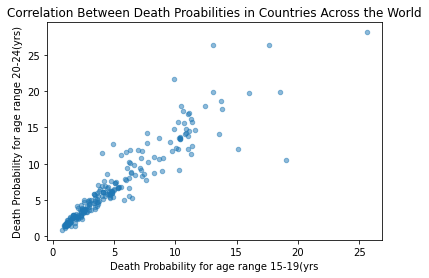

In [137]:
scatter_plot = complete_subset.plot.scatter(x=DEATH_PROB_15_19,y=DEATH_PROB_20_24, alpha=0.5)
scatter_plot.set_ylabel("Death Probability for age range 20-24(yrs)")
scatter_plot.set_xlabel("Death Probability for age range 15-19(yrs")
scatter_plot.set_title("Correlation Between Death Proabilities in Countries Across the World")
# slope, intercept, r, p, stderr = scipy.stats.linregress(x=complete_subset[DEATH_PROB_15_19],y=complete_subset[DEATH_PROB_20_24])

# Correlation:
* A strong, positive correlation suggests as one indicator increases, so does the other. A strong, negative correlation suggests as one indicator increases, the other decreases. 

In [95]:
corr_of_cs = complete_subset[DEATH_PROB_15_19].corr(complete_subset[DEATH_PROB_20_24])
print(corr_of_cs)

0.9298523363022826
